# Neural network for Regression

Source: https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style

class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    def backpropagation(self,y, z_s, a_s):
        dw = []  # dC/dW
        db = []  # dC/dB
        deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
        # insert the last layer error
        deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        # Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
        #a= [print(d.shape) for d in deltas]
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        # return the derivitives respect to weight matrix and biases
        return dw, db
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    # update weights and biases based on the output
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
                
    @staticmethod           
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
        
    @staticmethod 
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1
        
        
  

In [2]:
style.use('seaborn')

loss = 21.58879671068782
loss = 21.56331138749864
loss = 21.536682720340902
loss = 21.50885309479175
loss = 21.479763005829135
loss = 21.44935134994512
loss = 21.4175558273797
loss = 21.38431347856136
loss = 21.34956138248499
loss = 21.313237548449287
loss = 21.275282036061366
loss = 21.23563834131495
loss = 21.194255088311255
loss = 21.151088066058904
loss = 21.106102646745267
loss = 21.05927661460917
loss = 21.010603421447918
loss = 20.960095863962046
loss = 20.90779014750098
loss = 20.85375025828045
loss = 20.798072510187417
loss = 20.74089006230729
loss = 20.682377120677977
loss = 20.622752446957538
loss = 20.56228170653008
loss = 20.501278113437092
loss = 20.440100789781965
loss = 20.3791502783203
loss = 20.318860755946826
loss = 20.259688715230613
loss = 20.20209821965258
loss = 20.14654327986138
loss = 20.093448394170352
loss = 20.04318876340159
loss = 19.9960720210836
loss = 19.9523234086714
loss = 19.912076100183473
loss = 19.87536783652804
loss = 19.842144244721734
loss = 19.

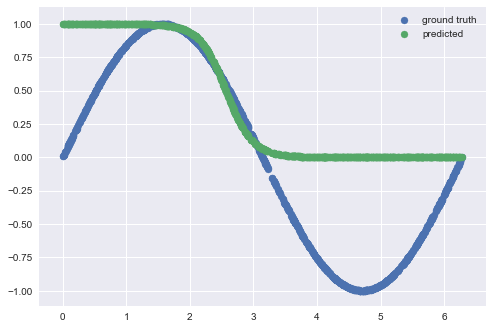

In [3]:
if __name__ == '__main__': 
    nn = NeuralNetwork([1,100,1], activations = ['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1,-1)
    y = np.sin(X)
    
    nn.train(X,y, epochs = 10000, batch_size = 64, lr = 0.1)
    z_s, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten(), label = 'ground truth')
    plt.scatter(X.flatten(), a_s[-1].flatten(), label = 'predicted')
    plt.legend()
    plt.show()
    

loss = 21.590232518264358
loss = 21.57300910562776
loss = 21.555669822177716
loss = 21.538263988465545
loss = 21.52083753012959
loss = 21.50343145787005
loss = 21.486080667268485
loss = 21.46881315899717
loss = 21.451649733018225
loss = 21.434604155531954
loss = 21.41768374441794
loss = 21.400890276931733
loss = 21.384221098893512
loss = 21.36767030978961
loss = 21.351229911111
loss = 21.33489083072492
loss = 21.318643767551617
loss = 21.302479832071082
loss = 21.286390984572822
loss = 21.27037029206235
loss = 21.254412035821826
loss = 21.238511705724854
loss = 21.222665916254726
loss = 21.206872274702647
loss = 21.19112922594891
loss = 21.17543589186274
loss = 21.159791917540325
loss = 21.144197331775917
loss = 21.128652425464864
loss = 21.113157649012816
loss = 21.097713528110624
loss = 21.082320596231927
loss = 21.066979341725848
loss = 21.051690167243915
loss = 21.036453359326085
loss = 21.021269066177897
loss = 21.006137281932318
loss = 20.99105783596209
loss = 20.9760303860658
lo

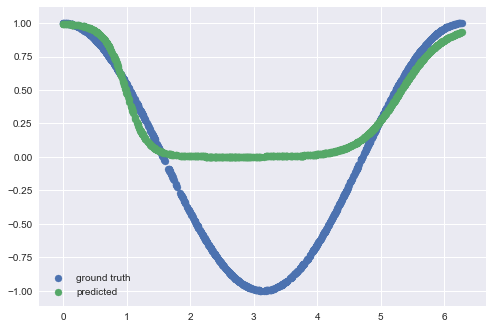

In [7]:
if __name__ == '__main__': 
    nn = NeuralNetwork([1,100,1], activations = ['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1,-1)
    y = np.cos(X)
    
    nn.train(X,y, epochs = 10000, batch_size = 100, lr = 0.1)
    z_s, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten(), label = 'ground truth')
    plt.scatter(X.flatten(), a_s[-1].flatten(), label = 'predicted')
    plt.legend()
    plt.show()

loss = 21.187810471916045
loss = 21.18780463763232
loss = 21.18779880035987
loss = 21.1877929600963
loss = 21.187787116839196
loss = 21.187781270586154
loss = 21.18777542133476
loss = 21.1877695690826
loss = 21.18776371382726
loss = 21.187757855566318
loss = 21.18775199429735
loss = 21.18774613001794
loss = 21.18774026272565
loss = 21.187734392418058
loss = 21.18772851909273
loss = 21.187722642747225
loss = 21.18771676337911
loss = 21.187710880985946
loss = 21.187704995565284
loss = 21.187699107114685
loss = 21.187693215631693
loss = 21.187687321113867
loss = 21.18768142355874
loss = 21.18767552296387
loss = 21.18766961932678
loss = 21.187663712645026
loss = 21.18765780291613
loss = 21.18765189013763
loss = 21.187645974307056
loss = 21.187640055421937
loss = 21.187634133479794
loss = 21.18762820847815
loss = 21.18762228041452
loss = 21.18761634928643
loss = 21.18761041509138
loss = 21.187604477826895
loss = 21.187598537490473
loss = 21.187592594079625
loss = 21.18758664759185
loss = 21

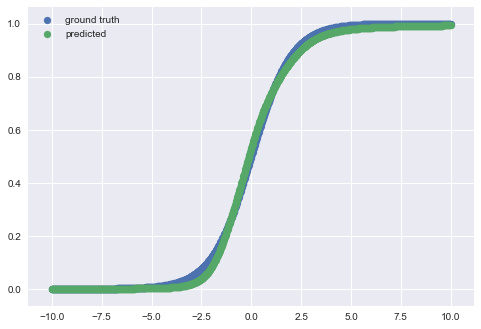

In [5]:
if __name__ == '__main__': 
    nn = NeuralNetwork([1,100,1], activations = ['sigmoid', 'sigmoid'])
    X = np.linspace(-10,10, 1000).reshape(1,-1)
    y = np.exp(X)/(1+np.exp(X))
    
    nn.train(X,y, epochs = 10000, batch_size = 64, lr = 0.01)
    z_s, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten(), label = 'ground truth')
    plt.scatter(X.flatten(), a_s[-1].flatten(), label = 'predicted')
    plt.legend()
    plt.show()